In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import particles

In [2]:
%matplotlib inline

In [3]:
# sns.set(style="ticks")
plt.rcParams['figure.figsize'] = (20, 16)
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

In [4]:
time = np.arange(0,4+1/500.,1/500.)

In [11]:
se = [1,100]#,142,200,1344,10000]

In [12]:
plt.style.use('ggplot')

In [13]:
folder = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1'

files = ["/xy_250.txt", 
         "/xy_500.txt",
         "/xy_750.txt",
         "/xy_1000.txt",
         "/xy_1250.txt",
         "/xy_1500.txt",
         "/xy_1750.txt",
         "/xy_2000.txt"]

### the end of the media

L = .1 #mm

### particle diameter range [nm]

for f in files:
    print f.split('_')[1].split('.')[0]

d =[int(f.split('_')[1].split('.')[0]) for f in files]

files_ = [folder + f for f in files]

250
500
750
1000
1250
1500
1750
2000


In [14]:
def zero_moment(pos):
    m0 = []
    for t in range(pos.shape[1]):
        s = pos[t].dropna().shape[0]
        if s is None:
            m0.append(0)
        else:
            m0.append(s)
    return np.array(m0)

In [15]:
def mom(n, position, time, m0, norm=True):
    mn = np.zeros(time.shape[0])
    for i in range(position.shape[1]):
        if m0[i]==0:
            print("no more particles in the media for moment_{1} [m^{1}] @ time = {0} [min]".format(time[i],n))
            print("")
            break
        else:
            mn[i] = np.sum(position[i]**n)
    if norm:
        return mn/m0
    else:
        return mn

# ONE SEED

In [21]:
gx = []
gy = []

files = ["/xy_250.txt", 
         "/xy_500.txt",
         "/xy_750.txt",
         "/xy_1000.txt",
         "/xy_1250.txt",
         "/xy_1500.txt",
         "/xy_1750.txt",
         "/xy_2000.txt"]

d =[int(f.split('_')[1].split('.')[0]) for f in files]
time = np.arange(0,4,1/500.)

for s in se[:]:
    print 'seed: ', s
    folder = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_'+str(s)
    files_ = [folder + f for f in files]
    print('x-dir')
    sx2 = []
    for f in range(len(files_))[:]:
        print(files_[f])
        par = particles.Particles(files_[f], dimension=2, time_start=0, time_end=4, time_step=100)
        x = par.qx[par.qx < .1]
        sx = []
        for t in range(x.shape[1]):
            a = x[t]
            a = a.dropna()
            if a.shape[0]==0:
                sx.append(0)
            else:
                sx.append((np.sum(a**2)/a.shape[0]) - (np.sum(a**1)/a.shape[0])**2)
        sx2.append(sx)

    l,h = 25,300

    dmx = []
    for i in range(len(sx2)):
        s = sx2[i][l:h]
        slope, intercept, r_value, p_value, std_err = stats.linregress(time[l:h],s)
        print(r_value**2, intercept)
        dmx.append(slope/2)
    gx.append(dmx)

    print('y-dir')

seed:  1
x-dir
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_250.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_500.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_750.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1000.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1250.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1500.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1750.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_2000.txt
y-dir
seed:  100
x-dir
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_100/xy_250.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromo

In [22]:
gx

[[0.00011929778482791752,
  0.00014988453968814655,
  0.00010498502617684159,
  0.00016951289144787485,
  0.00013186102445066132,
  0.00015818410400476128,
  0.00015011964229290649,
  0.00016185899816599853],
 [0.00010713982945661826,
  0.00018637580350315915,
  0.00013209747519055088,
  0.00014543499953175302,
  0.0001441511540818477,
  0.00017288426550189333,
  0.00013471577346257089,
  0.00012719435017420345]]

1.01001760281e-08 0.000132118405841


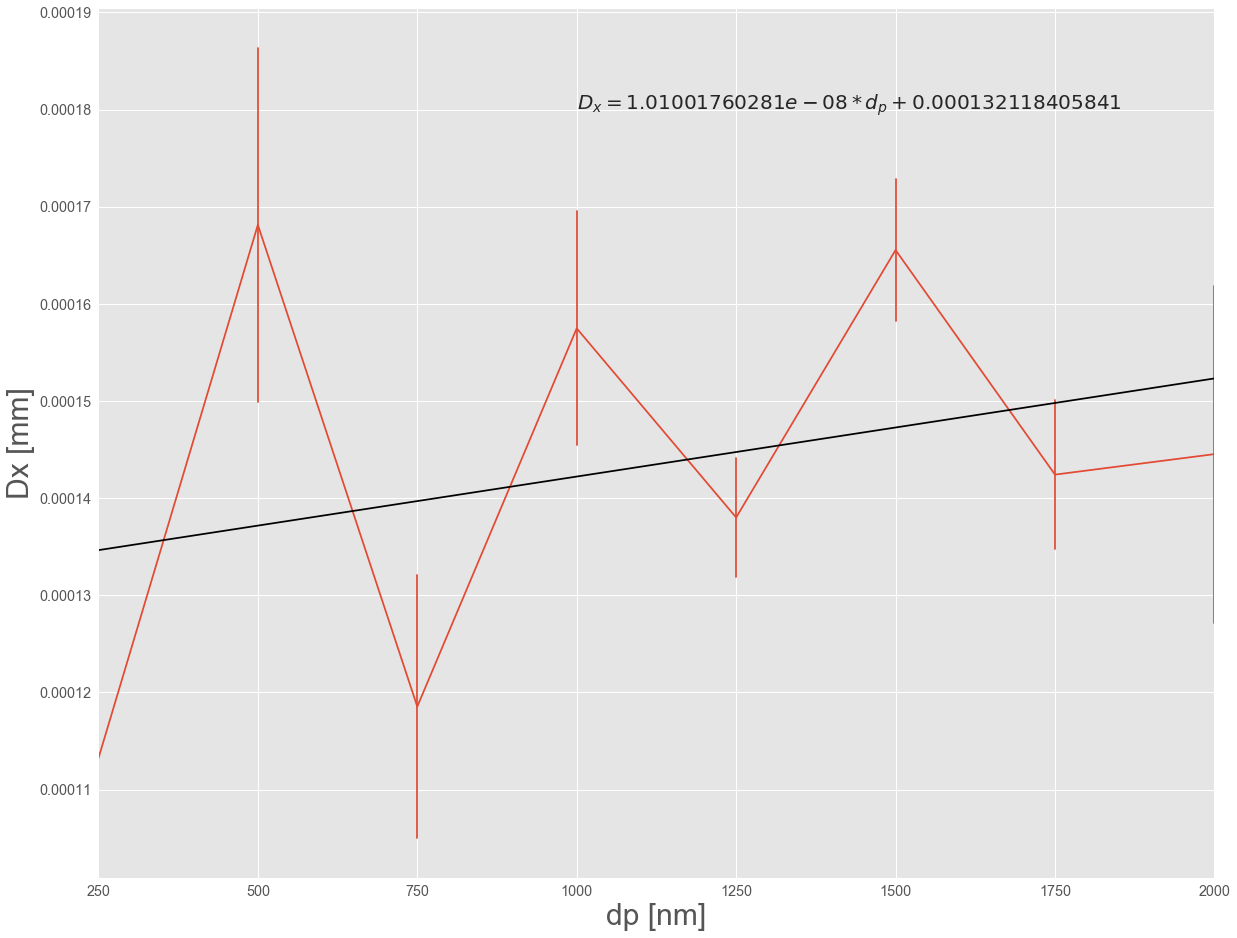

In [38]:
fig, ax = plt.subplots()
sns.tsplot(data=gx,time=d, err_style="ci_bars")
fit = np.polyfit(d, np.array(gx).mean(axis=0), deg=1)
ax.plot(d, fit[0] * np.array(d) + fit[1], color='black')
plt.text(1000, 0.00018, r'$D_x={0}*d_p+{1}$'.format(fit[0],fit[1]), fontsize=20)
plt.xlabel('dp [nm]', fontsize=30)
plt.ylabel('Dx [mm]', fontsize=30)
plt.xticks(d)
print fit[0], fit[1]

In [12]:
    sy2 = []
    for f in range(len(files_)):
        par = particles.Particles(files_[f], dimension=2, time_start=0, time_end=4, time_step=100)
        y = par.qy[par.qy<.1]
        sy = []
        for t in range(y.shape[1]):
            a = y[t]
            a = a.dropna()
            sy.append((np.sum(a**2)/a.shape[0]) - (np.sum(a**1)/a.shape[0])**2)
        sy2.append(sy)

    dmy = []
    for i in range(len(sy2)):
        s = sy2[i][l:h]
        slope, intercept, r_value, p_value, std_err = stats.linregress(time[l:h],s)
        dmy.append(slope/2)

    gx.append(dmx)
    gy.append(dmy)

seed:  1
x-dir
y-dir
seed:  100
x-dir
y-dir
seed:  142
x-dir
y-dir
seed:  200
x-dir
y-dir
seed:  1344
x-dir
y-dir
seed:  10000
x-dir
y-dir


# DISPERSION

### x

In [ ]:
fig, ax = plt.subplots()
sns.tsplot(data=gx,time=d, err_style="ci_bars")
fit = np.polyfit(d, np.array(gx).mean(axis=0), deg=1)
ax.plot(d, fit[0] * np.array(d) + fit[1], color='black')
# plt.text(2, 2, r'an equation: $E=mc^2$', fontsize=5)
plt.xlabel('dp [nm]', fontsize=30)
plt.ylabel('Dx [mm]', fontsize=30)
plt.xticks(d)
print fit[0], fit[1]

### y

6.78162017385e-09 1.65690203471e-05


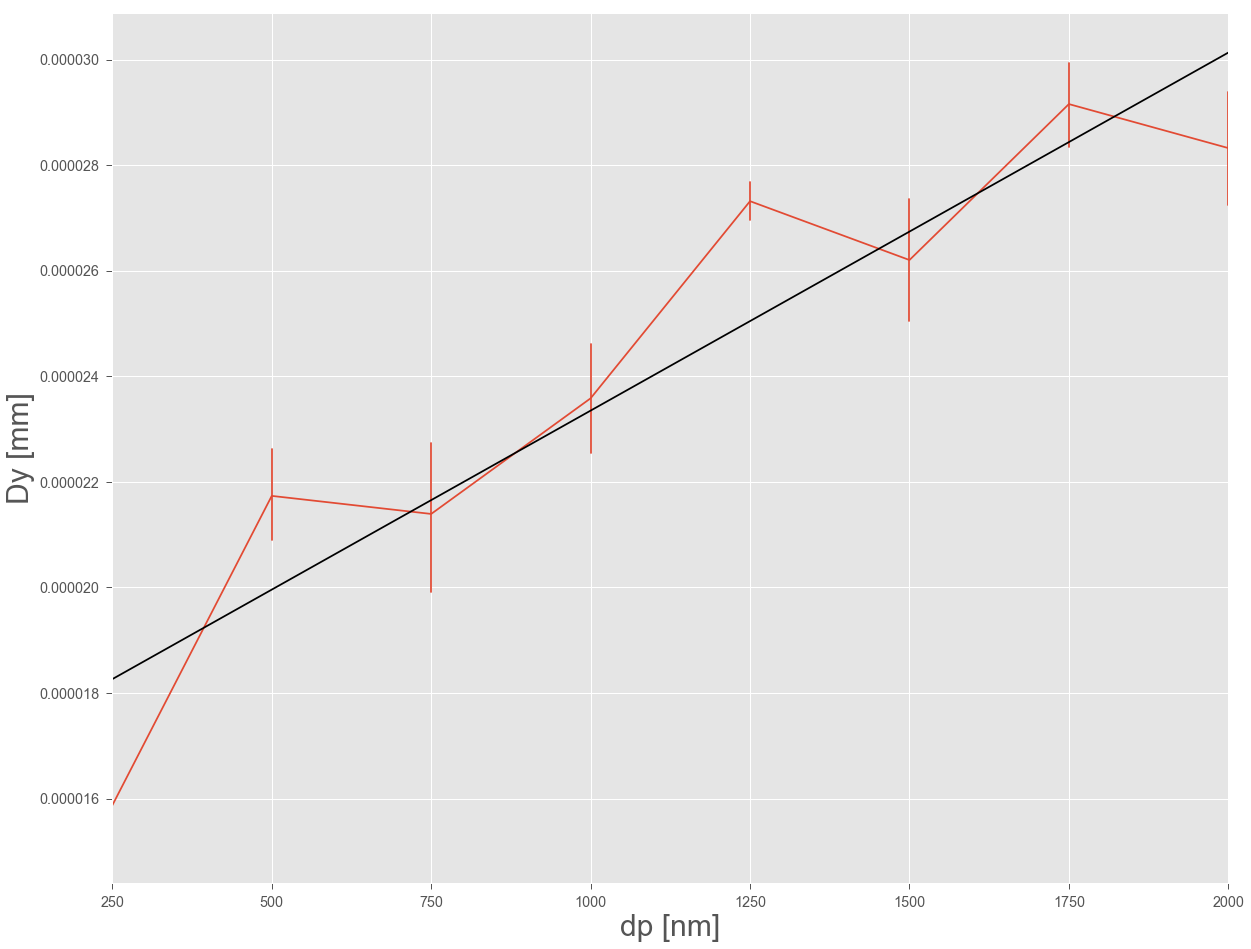

In [76]:
fig, ax = plt.subplots()
sns.tsplot(data=gy,time=d, err_style="ci_bars")
fit = np.polyfit(d, np.array(gy).mean(axis=0), deg=1)
ax.plot(d, fit[0] * np.array(d) + fit[1], color='black')
plt.xlabel('dp [nm]', fontsize=30)
plt.ylabel('Dy [mm]', fontsize=30)
plt.xticks(d)
print fit[0], fit[1]

# DISPERSIVITY

### x

6.12802561816e-07 0.0013464105879


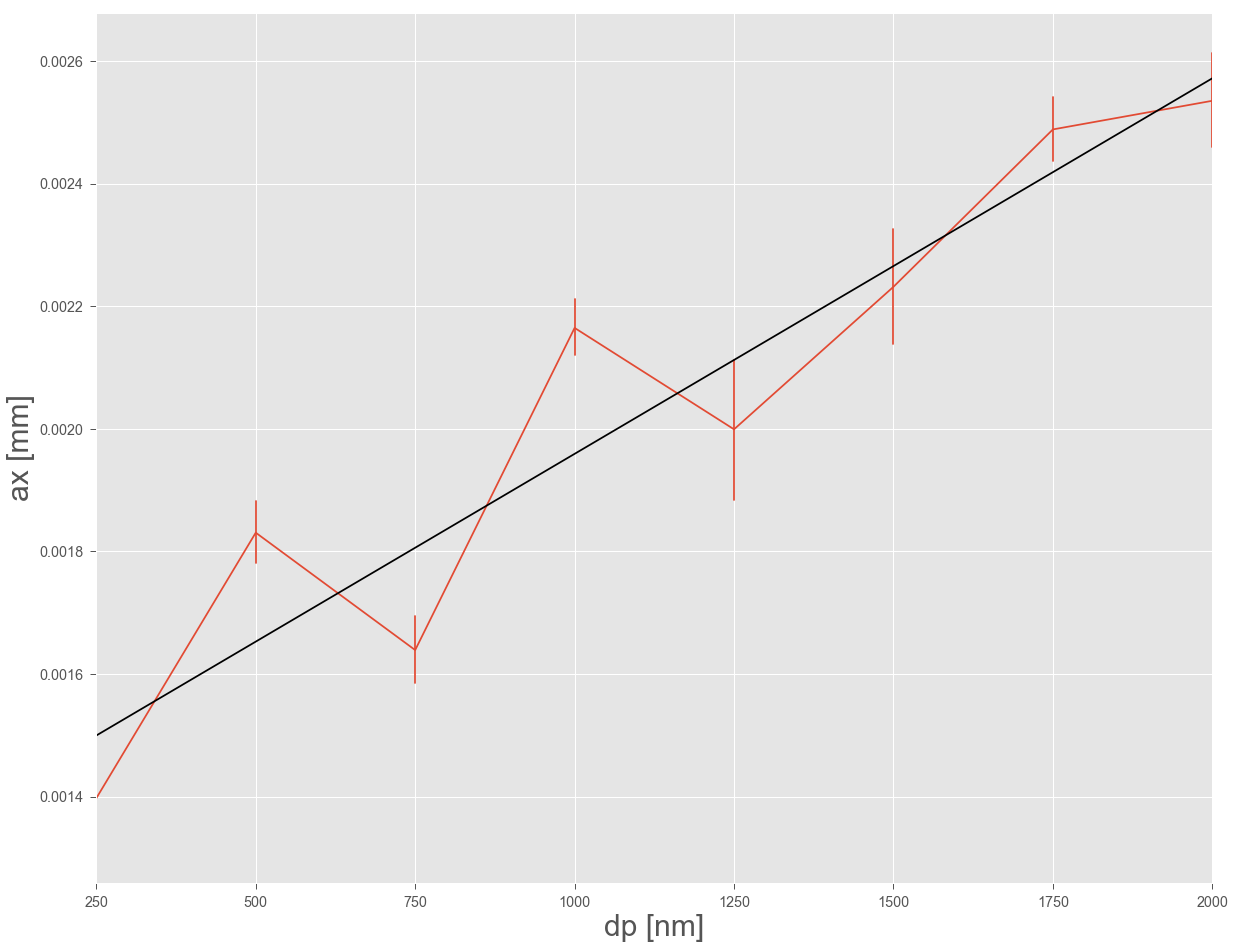

In [75]:
v_av =  0.000001 # m/s still needs to be checked
axs = []
for g in gx:
    xs = []
    for d in g:
        a = d/(v_av*60*1000)**1
        xs.append(a)
    axs.append(xs)
d =[int(f.split('_')[1].split('.')[0]) for f in files]
fig, ax = plt.subplots()
sns.tsplot(data=axs,time=d, err_style="ci_bars")
fit = np.polyfit(d, np.array(axs).mean(axis=0), deg=1)
ax.plot(d, fit[0] * np.array(d) + fit[1], color='black')
plt.xlabel('dp [nm]', fontsize=30)
plt.ylabel('ax [mm]', fontsize=30)
plt.xticks(d)

print fit[0], fit[1]

### y

1.13027002897e-07 0.000276150339118


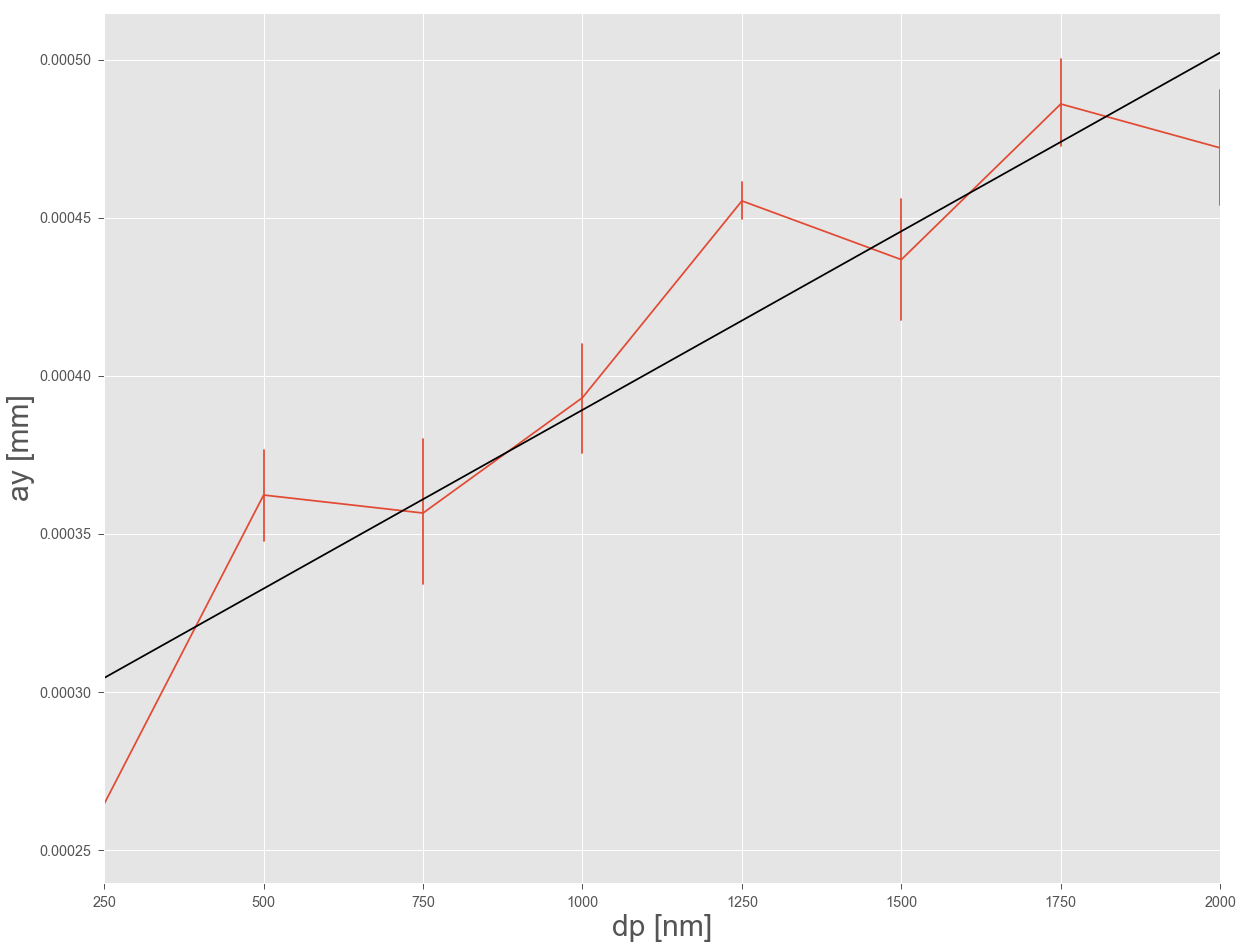

In [74]:
v_av =  0.000001 # m/s still needs to be checked
ays = []
for g in gy:
    ys = []
    for d in g:
        a = d/(v_av*60*1000)**1
        ys.append(a)
    ays.append(ys)
d =[int(f.split('_')[1].split('.')[0]) for f in files]
fig, ax = plt.subplots()
sns.tsplot(data=ays,time=d, err_style="ci_bars")
fit = np.polyfit(d, np.array(ays).mean(axis=0), deg=1)
ax.plot(d, fit[0] * np.array(d) + fit[1], color='black')
plt.xlabel('dp [nm]', fontsize=30)
plt.ylabel('ay [mm]', fontsize=30)
plt.xticks(d)
print fit[0], fit[1]